## Breast Cancer Wisconsin (Prognostic)

This is a classification problem that explores the effect of various cell, tumor, and patient characteristics on the likelihood of recurring breast cancer.

In [5]:
import pandas as pd

#setting up dataset
df = pd.read_csv('C:/Users/rachr/Rowey-DATA1030-Project/wpbc.data')
df.columns = ['ID number', 'outcome', 'time', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3', 'tumor_size', 'lymph_node_status']
print(df)

     ID number outcome  time  radius1  texture1  perimeter1   area1  \
0         8423       N    61    17.99     10.38      122.80  1001.0   
1       842517       N   116    21.37     17.44      137.50  1373.0   
2       843483       N   123    11.42     20.38       77.58   386.1   
3       843584       R    27    20.29     14.34      135.10  1297.0   
4       843786       R    77    12.75     15.29       84.60   502.7   
..         ...     ...   ...      ...       ...         ...     ...   
192     942640       N    10    22.52     21.92      146.90  1597.0   
193     943471       N     8    15.44     31.18      101.00   740.4   
194      94547       N    12    17.17     29.19      110.00   915.3   
195     947204       R     3    21.42     22.84      145.00  1440.0   
196     947489       N     6    16.70     28.13      110.30   885.4   

     smoothness1  compactness1  concavity1  ...  perimeter3   area3  \
0        0.11840       0.27760     0.30010  ...      184.60  2019.0   
1    

## EDA

In [7]:
#counting rows and columns
num_rows, num_columns = df.shape
print('Number of Rows:', num_rows)
print('Number of Columns:', num_columns)

#data types of columns
print('Column data types:')
print(df.dtypes.to_string())

#convert outcome column values [N, R] to numerical data [0, 1]
df['outcome'] = df['outcome'].replace({'N': 0, 'R': 1})

#target variable (Outcome: N=0=nonrecur, R=1=recur)
outcome_category_counts = df['outcome'].value_counts();
print(outcome_category_counts)
print('Target Variable: Categorical')

Number of Rows: 197
Number of Columns: 35
Column data types:
ID number               int64
outcome                 int64
time                    int64
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3

outcome
0    150
1     47
Name: count, dtype: int64


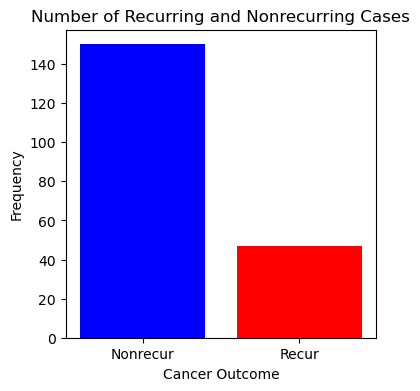

In [64]:
#visualize target variable
import matplotlib.pyplot as plt

print(outcome_category_counts)

plt.figure(figsize=(4, 4))
plt.bar(outcome_category_counts.index, outcome_category_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Nonrecur', 'Recur'])
plt.title('Number of Recurring and Nonrecurring Cases')
plt.xlabel('Cancer Outcome')
plt.ylabel('Frequency')
plt.show()

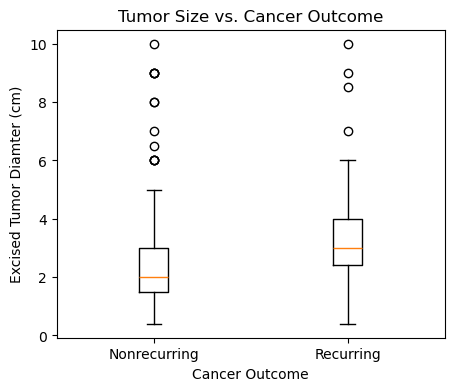

Mean tumor size for Nonrecurring: 2.64 cm
Mean tumor size for Recurring: 3.46 cm


In [65]:
#visualizations

import matplotlib.pyplot as plt

#correlation between tumor size and cancer outcome
plt.figure(figsize=(5, 4))
plt.boxplot([df[df['outcome'] == 0]['tumor_size'], df[df['outcome'] == 1]['tumor_size']], 
            tick_labels=['Nonrecurring', 'Recurring'])

plt.title('Tumor Size vs. Cancer Outcome')
plt.xlabel('Cancer Outcome')
plt.ylabel('Excised Tumor Diamter (cm)')
plt.show()

#means
mean_nonrecurring = df[df['outcome'] == 0]['tumor_size'].mean()
mean_recurring = df[df['outcome'] == 1]['tumor_size'].mean()

print(f"Mean tumor size for Nonrecurring: {mean_nonrecurring:.2f} cm")
print(f"Mean tumor size for Recurring: {mean_recurring:.2f} cm")

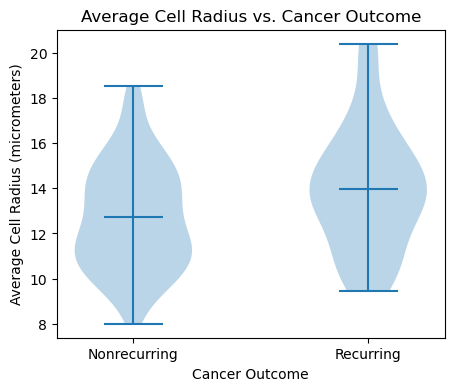

Mean cell radius for Nonrecurring: 12.71 micrometers
Mean cell radius for Recurring: 13.95 micrometers


In [66]:
#correlation between average radius and cancer outcome
df['radius_avg'] = df[['radius1', 'radius2', 'radius3']].mean(axis=1)

plt.figure(figsize=(5, 4))
radius_data = [df[df['outcome'] == 0]['radius_avg'], df[df['outcome'] == 1]['radius_avg']]
plt.violinplot(radius_data, showmeans=True)
plt.xticks([1, 2], ['Nonrecurring', 'Recurring'])

plt.title('Average Cell Radius vs. Cancer Outcome')
plt.xlabel('Cancer Outcome')
plt.ylabel('Average Cell Radius (micrometers)')
plt.show()

#means
mean_nonrecurring = df[df['outcome'] == 0]['radius_avg'].mean()
mean_recurring = df[df['outcome'] == 1]['radius_avg'].mean()

print(f"Mean cell radius for Nonrecurring: {mean_nonrecurring:.2f} micrometers")
print(f"Mean cell radius for Recurring: {mean_recurring:.2f} micrometers")

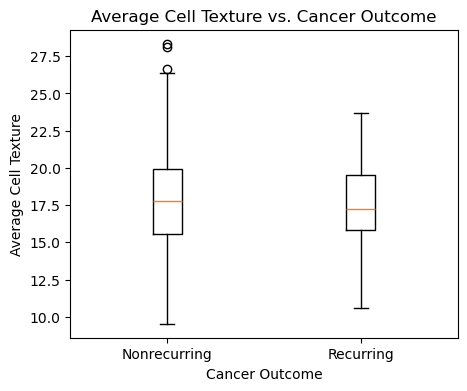

In [14]:
#correlation between average texture and cancer outcome
df['texture_avg'] = df[['texture1', 'texture2', 'texture3']].mean(axis=1)

plt.figure(figsize=(5, 4))
plt.boxplot([df[df['outcome'] == 0]['texture_avg'], df[df['outcome'] == 1]['texture_avg']], 
            tick_labels=['Nonrecurring', 'Recurring'])

plt.title('Average Cell Texture vs. Cancer Outcome')
plt.xlabel('Cancer Outcome')
plt.ylabel('Average Cell Texture')
plt.show()

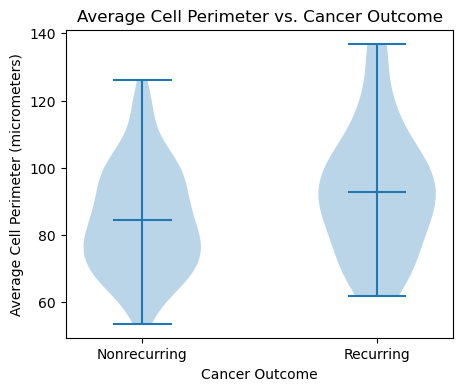

Mean cell perimeter for Nonrecurring: 84.47 micrometers
Mean cell perimeter for Recurring: 92.92 micrometers


In [67]:
#correlation between average perimeter and cancer outcome
df['perimeter_avg'] = df[['perimeter1', 'perimeter2', 'perimeter3']].mean(axis=1)

plt.figure(figsize=(5, 4))
perimeter_data = [df[df['outcome'] == 0]['perimeter_avg'], df[df['outcome'] == 1]['perimeter_avg']]
plt.violinplot(perimeter_data, showmeans=True)
plt.xticks([1, 2], ['Nonrecurring', 'Recurring'])

plt.title('Average Cell Perimeter vs. Cancer Outcome')
plt.xlabel('Cancer Outcome')
plt.ylabel('Average Cell Perimeter (micrometers)')
plt.show()

#means
mean_nonrecurring = df[df['outcome'] == 0]['perimeter_avg'].mean()
mean_recurring = df[df['outcome'] == 1]['perimeter_avg'].mean()

print(f"Mean cell perimeter for Nonrecurring: {mean_nonrecurring:.2f} micrometers")
print(f"Mean cell perimeter for Recurring: {mean_recurring:.2f} micrometers")

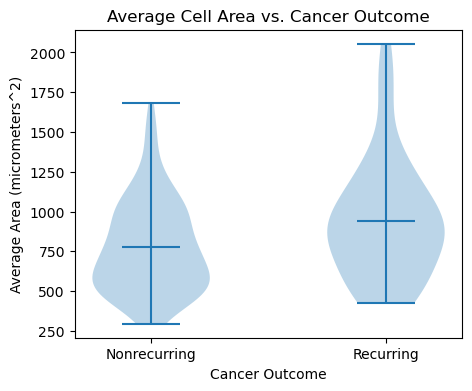

Mean cell area for Nonrecurring: 775.31 micrometers^2
Mean cell area for Recurring: 941.45 micrometers^2


In [68]:
#correlation between average area and cancer outcome
df['area_avg'] = df[['area1', 'area2', 'area3']].mean(axis=1)

plt.figure(figsize=(5, 4))
area_data = [df[df['outcome'] == 0]['area_avg'], df[df['outcome'] == 1]['area_avg']]
plt.violinplot(area_data, showmeans=True)
plt.xticks([1, 2], ['Nonrecurring', 'Recurring'])

plt.title('Average Cell Area vs. Cancer Outcome')
plt.xlabel('Cancer Outcome')
plt.ylabel('Average Area (micrometers^2)')
plt.show()

#means
mean_nonrecurring = df[df['outcome'] == 0]['area_avg'].mean()
mean_recurring = df[df['outcome'] == 1]['area_avg'].mean()

print(f"Mean cell area for Nonrecurring: {mean_nonrecurring:.2f} micrometers^2")
print(f"Mean cell area for Recurring: {mean_recurring:.2f} micrometers^2")

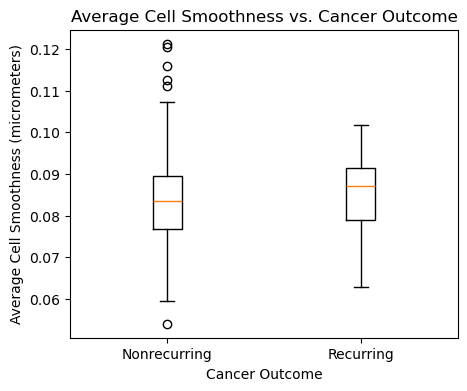

In [19]:
#correlation between average smoothness and cancer outcome
df['smoothness_avg'] = df[['smoothness1', 'smoothness2', 'smoothness3']].mean(axis=1)

plt.figure(figsize=(5, 4))
plt.boxplot([df[df['outcome'] == 0]['smoothness_avg'], df[df['outcome'] == 1]['smoothness_avg']], 
            tick_labels=['Nonrecurring', 'Recurring'])

plt.title('Average Cell Smoothness vs. Cancer Outcome')
plt.xlabel('Cancer Outcome')
plt.ylabel('Average Cell Smoothness (micrometers)')
plt.show()

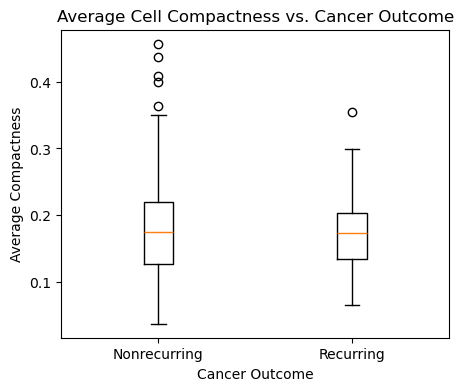

In [20]:
#correlation between average compactness and cancer outcome
df['compactness_avg'] = df[['compactness1', 'compactness2', 'compactness3']].mean(axis=1)

plt.figure(figsize=(5, 4))
plt.boxplot([df[df['outcome'] == 0]['compactness_avg'], df[df['outcome'] == 1]['compactness_avg']], 
            tick_labels=['Nonrecurring', 'Recurring'])

plt.title('Average Cell Compactness vs. Cancer Outcome')
plt.xlabel('Cancer Outcome')
plt.ylabel('Average Compactness')
plt.show()

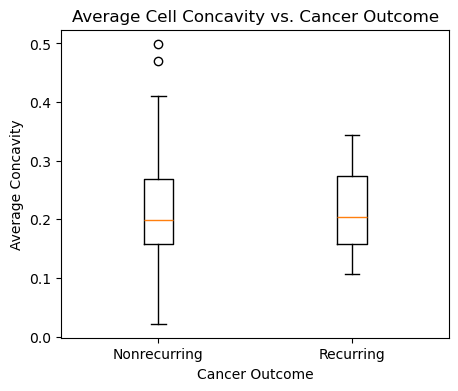

In [21]:
#correlation between average concavity and cancer outcome
df['concavity_avg'] = df[['concavity1', 'concavity2', 'concavity3']].mean(axis=1)

plt.figure(figsize=(5, 4))
plt.boxplot([df[df['outcome'] == 0]['concavity_avg'], df[df['outcome'] == 1]['concavity_avg']], 
            tick_labels=['Nonrecurring', 'Recurring'])

plt.title('Average Cell Concavity vs. Cancer Outcome')
plt.xlabel('Cancer Outcome')
plt.ylabel('Average Concavity')
plt.show()

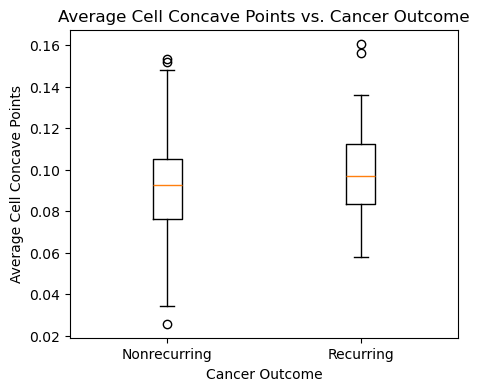

In [25]:
#correlation between average concave points and cancer outcome
df['concave_points_avg'] = df[['concave_points1', 'concave_points2', 'concave_points3']].mean(axis=1)

plt.figure(figsize=(5, 4))
plt.boxplot([df[df['outcome'] == 0]['concave_points_avg'], df[df['outcome'] == 1]['concave_points_avg']], 
            tick_labels=['Nonrecurring', 'Recurring'])

plt.title('Average Cell Concave Points vs. Cancer Outcome')
plt.xlabel('Cancer Outcome')
plt.ylabel('Average Cell Concave Points')
plt.show()

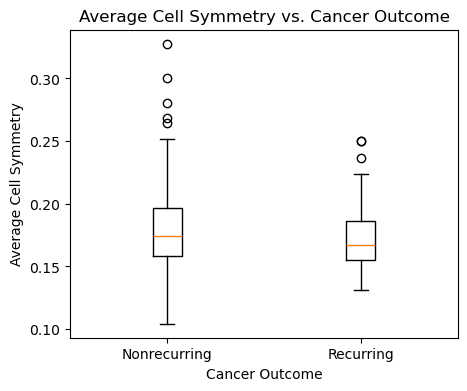

In [26]:
#correlation between average symmetry and cancer outcome
df['symmetry_avg'] = df[['symmetry1', 'symmetry2', 'symmetry3']].mean(axis=1)

plt.figure(figsize=(5, 4))
plt.boxplot([df[df['outcome'] == 0]['symmetry_avg'], df[df['outcome'] == 1]['symmetry_avg']], 
            tick_labels=['Nonrecurring', 'Recurring'])

plt.title('Average Cell Symmetry vs. Cancer Outcome')
plt.xlabel('Cancer Outcome')
plt.ylabel('Average Cell Symmetry')
plt.show()

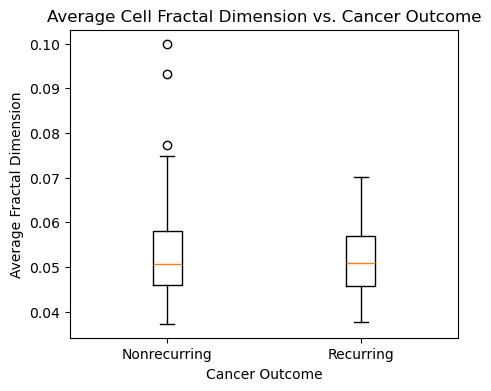

In [27]:
#correlation between average fractal dimension and cancer outcome
df['fractal_dimension_avg'] = df[['fractal_dimension1', 'fractal_dimension2', 'fractal_dimension3']].mean(axis=1)

plt.figure(figsize=(5, 4))
plt.boxplot([df[df['outcome'] == 0]['fractal_dimension_avg'], df[df['outcome'] == 1]['fractal_dimension_avg']], 
            tick_labels=['Nonrecurring', 'Recurring'])

plt.title('Average Cell Fractal Dimension vs. Cancer Outcome')
plt.xlabel('Cancer Outcome')
plt.ylabel('Average Fractal Dimension')
plt.show()

In [54]:
#preprocessing part 1: ordinal missing values

#missing values in lymph node status column
#replace '?' with 'NA'
df['lymph_node_status'] = df['lymph_node_status'].replace('?','NA')

#order categories
categories_order = ['0','1','2','3','4','5','6','7','8','9','10','11','13','14','15','16','17','18','20','21','24','27','NA']

#ensure categorical data type with specified category order
df['lymph_node_status'] = pd.Categorical(df['lymph_node_status'], 
                                         categories=categories_order, 
                                         ordered=True)

print(df['lymph_node_status'].dtypes) 
print(df['lymph_node_status'].unique())

category
[NaN]
Categories (23, object): ['0' < '1' < '2' < '3' ... '21' < '24' < '27' < 'NA']


C:\Users\rachr\AppData\Local\Temp\ipykernel_18940\4166504053.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['lymph_node_status', 'outcome']).size().unstack(fill_value=0)


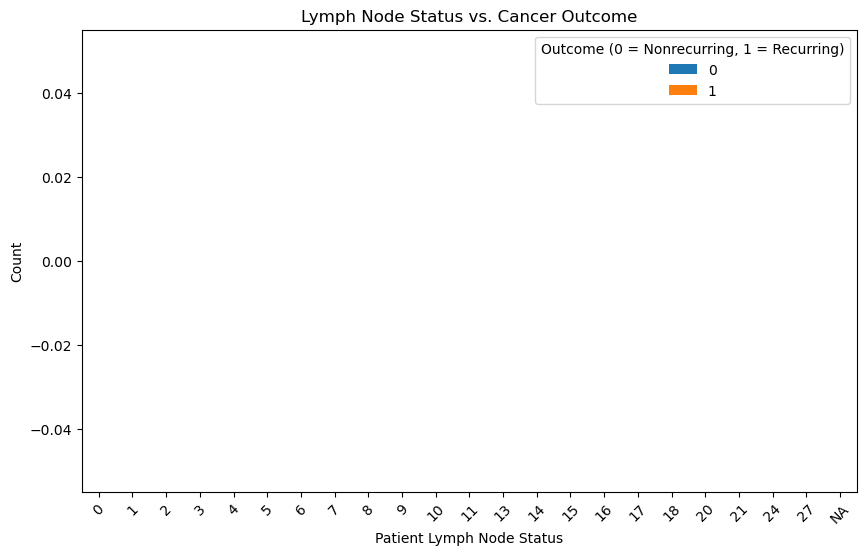

In [56]:
#correlation between lymph node status and cancer outcome
grouped = df.groupby(['lymph_node_status', 'outcome']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Lymph Node Status vs. Cancer Outcome')
plt.xlabel('Patient Lymph Node Status')
plt.ylabel('Count')
plt.legend(title='Outcome (0 = Nonrecurring, 1 = Recurring)')
plt.show()

In [ ]:
#preprocessing part 2: encoding categorical variables (lymph node status)

#OrdinalEncoder() for lymph node status
df['lymph_node_status'] = df['lymph_node_status'].astype('category')
ordinal_encoder = OrdinalEncoder()
df['lymph_node_status'] = ordinal_encoder.fit_transform(df[['lymph_node_status']])

print(df.dtypes)

In [ ]:
#preprocessing part 3: feature engineering (adding average values)

df['fractal_dimension_avg'] = df[['fractal_dimension1', 'fractal_dimension2', 'fractal_dimension3']].mean(axis=1)
df['symmetry_avg'] = df[['symmetry1', 'symmetry2', 'symmetry3']].mean(axis=1)
df['concave_points_avg'] = df[['concave_points1', 'concave_points2', 'concave_points3']].mean(axis=1)
df['concavity_avg'] = df[['concavity1', 'concavity2', 'concavity3']].mean(axis=1)
df['compactness_avg'] = df[['compactness1', 'compactness2', 'compactness3']].mean(axis=1)
df['smoothness_avg'] = df[['smoothness1', 'smoothness2', 'smoothness3']].mean(axis=1)
df['area_avg'] = df[['area1', 'area2', 'area3']].mean(axis=1)
df['perimeter_avg'] = df[['perimeter1', 'perimeter2', 'perimeter3']].mean(axis=1)
df['texture_avg'] = df[['texture1', 'texture2', 'texture3']].mean(axis=1)
df['radius_avg'] = df[['radius1', 'radius2', 'radius3']].mean(axis=1)

## Splitting

In [62]:
#dealing with iid, imbalanced (use stratified split), small (use KFold method) dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

#set up target variable y and feature matrix X
y = df['outcome']
X = df[['time','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1',
        'symmetry1','fractal_dimension1','radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2',
        'symmetry2','fractal_dimension2','radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3',
        'symmetry3','fractal_dimension3','tumor_size','lymph_node_status','compactness_avg','radius_avg','texture_avg','perimeter_avg','area_avg',
        'smoothness_avg','concavity_avg','concave_points_avg','symmetry_avg','fractal_dimension_avg']]

#stratified K Fold
from sklearn.model_selection import StratifiedKFold 
random_state = 42

#stratified 'other'-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('Test data balance:',np.unique(y_test,return_counts=True))
    
#StratifiedKFold split on 'other'
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('New fold:')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('Train data balance:', np.unique(y_train,return_counts=True))
    print('Validation data balance:', np.unique(y_val,return_counts=True))

Test data balance: (array([0, 1], dtype=int64), array([30, 10], dtype=int64))
New fold:
Train data balance: (array([0, 1], dtype=int64), array([96, 29], dtype=int64))
Validation data balance: (array([0, 1], dtype=int64), array([24,  8], dtype=int64))
New fold:
Train data balance: (array([0, 1], dtype=int64), array([96, 29], dtype=int64))
Validation data balance: (array([0, 1], dtype=int64), array([24,  8], dtype=int64))
New fold:
Train data balance: (array([0, 1], dtype=int64), array([96, 30], dtype=int64))
Validation data balance: (array([0, 1], dtype=int64), array([24,  7], dtype=int64))
New fold:
Train data balance: (array([0, 1], dtype=int64), array([96, 30], dtype=int64))
Validation data balance: (array([0, 1], dtype=int64), array([24,  7], dtype=int64))
New fold:
Train data balance: (array([0, 1], dtype=int64), array([96, 30], dtype=int64))
Validation data balance: (array([0, 1], dtype=int64), array([24,  7], dtype=int64))


In [63]:
#preprocessing part 3: scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit the scaler on training data only
X_train_scaled = scaler.fit_transform(X_train)

#transform the validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#convert back to dataframes for clarity
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print('Scaled training data:')
print(X_train_scaled_df.head()) #check for reproducibility

Scaled training data:
       time   radius1  texture1  perimeter1     area1  smoothness1  \
0 -1.310076 -0.797852  0.821024   -0.682542 -0.834833     1.093244   
1 -1.253968  1.896638  1.161262    2.109896  2.052889     0.832046   
2 -1.057590 -0.027548  1.769345   -0.180446 -0.110303    -1.113484   
3  0.513432 -0.964489  1.004415   -0.822585 -0.905375     0.111772   
4  1.635591  0.440922 -1.143183    0.353499  0.344144     0.143433   

   compactness1  concavity1  concave_points1  symmetry1  ...  compactness_avg  \
0      1.336279    0.234554         0.209775   0.458767  ...         1.128302   
1      1.280666    2.871865         2.241489   0.882079  ...         0.602266   
2     -1.536742   -1.339454        -1.116647  -0.541786  ...        -1.385952   
3      0.788091    0.652055        -0.293101  -0.188444  ...         1.604792   
4     -0.673743   -0.165306        -0.031558   0.063444  ...        -0.836348   

   radius_avg  texture_avg  perimeter_avg  area_avg  smoothness_avg  \

C:\Users\rachr\anaconda3\envs\data1030\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\rachr\anaconda3\envs\data1030\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\rachr\anaconda3\envs\data1030\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
